In [25]:
image_data = '/Users/k/Desktop/StudySource/source/image.JPEG'
video_data = '/Users/k/Desktop/StudySource/source/IMG_7874.MOV'

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [62]:
image = cv2.imread(image_data, cv2.IMREAD_GRAYSCALE)
image_bgr = cv2.imread(image_data, cv2.IMREAD_COLOR)

In [63]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

### 이미지 저장

In [29]:
cv2.imwrite('./new_image.jpg', image)

True

### 이미지 크기 변경

> cv2.resize('이미지파일', (가로,세로))

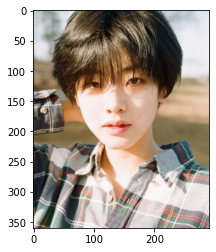

In [30]:
plt.imshow(image_rgb)

In [31]:
image_50x50 = cv2.resize(image_rgb, (50,50))

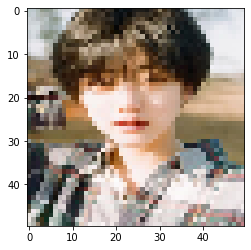

In [32]:
plt.imshow(image_50x50)

Text(0.5, 1.0, 'Resized Image')

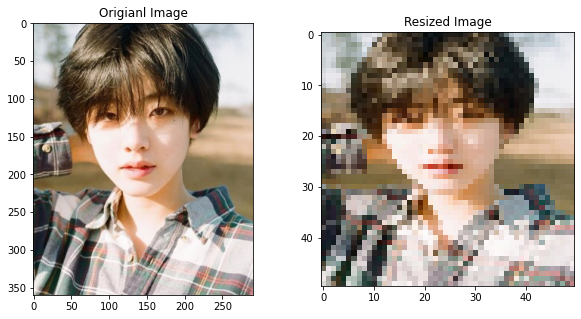

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(image_rgb, cmap='gray')
ax[0].set_title('Origianl Image')
ax[1].imshow(image_50x50, cmap='gray')
ax[1].set_title('Resized Image')

### 이미지 자르기

> image[:,:]

> 이미지를 자르고 싶은 경우 배열 슬라이싱을 이용하여 원하는 부분만 crop 가능

In [46]:
image_cropped = image_rgb[:,:128]
image_cropped2 = image_rgb[128:,:]

Text(0.5, 1.0, '[128:,:]')

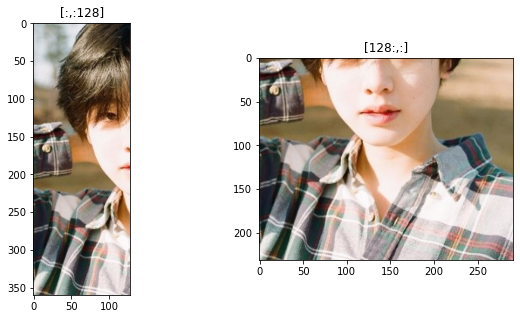

In [53]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image_cropped)
ax[0].set_title('[:,:128]')
ax[1].imshow(image_cropped2)
ax[1].set_title('[128:,:]')

### 이미지 Blur 처리

> 이미지를 흐리게 하기 위해서는 각 픽셀을 주변 픽셀의 평균값으로 변환하면 되며, 이렇게 주변 픽셀에 수행되는 연산을 커널(kernel)이라고 한다. 

> 커널이 클수록 이미지가 더 부드러워지게 된다.

In [77]:
image_blur = cv2.blur(image_rgb, (5,5))

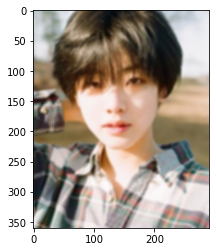

In [78]:
plt.imshow(image_blur)

- 100x100 커널과 같이 큰 커널을 적용할 경우 이미지가 훨씬 뭉게진다

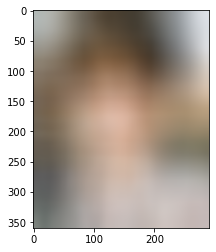

In [82]:
image_very_blur = cv2.blur(image_rgb, (100,100))
plt.imshow(image_very_blur)

> 커널을 직접 정의한 후 filter2D() 메소드를 통해 이미지에 적용하는 것도 가능하다.

>생성된 커널을 이미지에 적용 시 중앙 원소가 변환되는 픽셀이며, 나머지는 그 픽셀의 이웃이 된다.

In [117]:
my_kernel = np.ones((10,10)) / 25.0
my_kernel2 = np.ones((10,10)) * -1.0
my_kernel3 = np.ones((10,10)) /100.0
my_kernel4 = np.ones((10,10)) * 1.0

In [119]:
image_kernel = cv2.filter2D(image_rgb, -1 , my_kernel)
image_kernel2 = cv2.filter2D(image_rgb, -1 , my_kernel2)
image_kernel3 = cv2.filter2D(image_rgb, -1, my_kernel3)
image_kernel4 = cv2.filter2D(image_rgb, -1, my_kernel4)

Text(0.5, 1.0, '1')

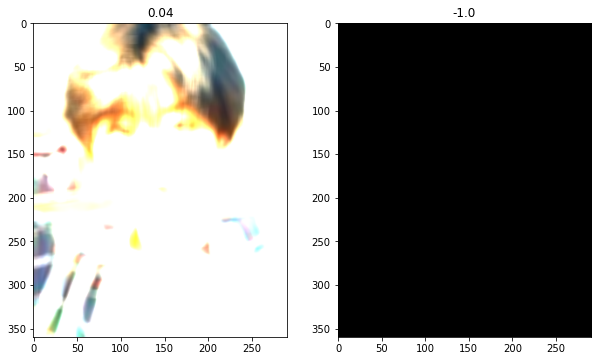

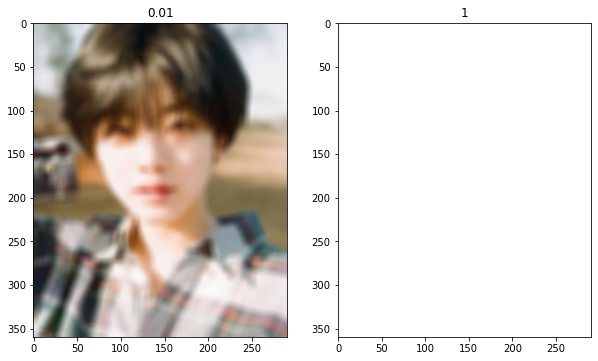

In [122]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(image_kernel)
ax[0].set_title('0.04')
ax[1].imshow(image_kernel2)
ax[1].set_title('-1.0')

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(image_kernel3)
ax[0].set_title('0.01')
ax[1].imshow(image_kernel4)
ax[1].set_title('1')

> 자주 사용되는 블러 함수로 가우시안 분포를 사용하는 가우시안 블러(GaussianBlur)가 있다. 

> GaussianBlur() 함수의 세 번째 매개변수는 X축(너비) 방향의 표준편차이며, 0으로 지정하면 ((너비-1)0.5-1)0.3+0.8과 같이 계산된다.

In [135]:
image_very_blur = cv2.GaussianBlur(image_rgb, (5,5), 0)
image_very_blur2 = cv2.GaussianBlur(image_rgb, (50,50), 0)

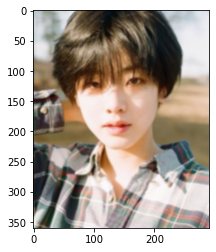

In [137]:
plt.imshow(image_very_blur)

In [138]:
plt.imshow(image_very_blur2)

NameError: name 'image_very_blur2' is not defined